## LangGraph

LangGraph is a framework which is used for building adaptable AI agents. It is build on top of langchain, and provides a flexible and intutive way to build highly customizable and state agnostic multi agentic applications. It allows to define a workflow as directed acyclic graphs (DAGs), where each node in the graph represents a specific action or AI agent, and edges define the flow of control. 

### Core Concepts

Let's break down the fundamental building blocks of a LangGraph application:

1. **Graph**: The central component, representing your application's workflow as a collection of nodes and edges.
2. **Nodes**: These are the "actors" or "steps" in your workflow. It represents any specefic action or AI agent. A node can be:
    - An LLM call
    - A tool invocation (e.g., a search API, a calculator)
    - A custom Python function
    - Another LangChain runnable
3. **Edges**: These define the transitions between nodes. They dictate which node executes next after a particular node completes. Edges can be:
    - **Conditional Edges**: Based on the output of a node, the graph can transition to different subsequent nodes.
    - **Direct Edges**: Simply point from one node to the next.
4. **State**: While LangGraph itself is state-agnostic in its node execution, you often define a shared "graph state" that is passed between nodes. Each node can read from and write to this state. This state is often defined as a TypedDict. Defining the State of the graph is important. It serves as the input schema for all Nodes and Edges in the graph.
5. **Entry Point**: The designated starting node for your graph's execution.
6. **Finish Point (END)**: A special marker signifying the conclusion of a workflow path.

This notebook will guide you through the fundamental steps of constructing a graph, including defining its state, adding simple Python functions as nodes, connecting them with edges, setting a starting point, and compiling it. We'll then significantly enhance our graph by integrating external tools like WikipediaQueryRun and TavilySearchResults, and demonstrating how to wrap a custom function into a tool (In 3.2 tools notebook).


### Step-by-Step : Building a Simple Graph

Let's start with a basic graph structure as mentioned above, which initialy takes your first name as input, then adds your last name in the result. This will help us ensure our foundational understanding.

In [10]:
## we have created two fucntion
## first one will take your first name as input
def first_name(input1):
    return input1 

## in our graph return from first function will work as input for second function
def last_name(input2):
    return input2 + " Sharma"

print(last_name(first_name('Ashutosh')))

Ashutosh Sharma


In [11]:
## orchestrate these function using langgraph
from langgraph.graph import Graph

## Building the graph
workflow_name = Graph()
## adding first_name as a node
workflow_name.add_node('First_Name', first_name)
## adding second name as node
workflow_name.add_node('Last_Name', last_name)
## adding edges from 1st function to 2nd
## result from first node will be passed to second node
workflow_name.add_edge('First_Name','Last_Name')
## set the entry point of our graph
workflow_name.set_entry_point('First_Name')
## set the finish point
workflow_name.set_finish_point('Last_Name')
## compile the graph
app = workflow_name.compile()


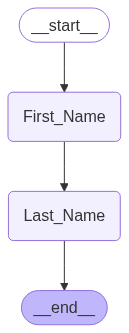

In [12]:
app

In [13]:
app.invoke("Ashutosh")

'Ashutosh Sharma'

In [16]:
for output in app.stream("Shanu"):
    for key,value in output.items():
        print(f"Here is output from :  {key}")
        print("-"*30)
        print(f"Here is output :  {value}\n")

Here is output from :  First_Name
------------------------------
Here is output :  Shanu

Here is output from :  Last_Name
------------------------------
Here is output :  Shanu Sharma



In [12]:
from langchain_openai import ChatOpenAI

In [13]:
def llm(input):
    model= ChatOpenAI(model='gpt-4o-mini')
    output = model.invoke(input)
    return output.content

def token_counter(input):
    token = str(input).split()
    count_no = len(token)
    return count_no

In [14]:
token_counter("This is ashu")

3

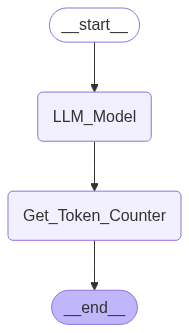

In [18]:
workflow2 = Graph()
workflow2.add_node('LLM_Model',llm)
workflow2.add_node('Get_Token_Counter',token_counter)
workflow2.add_edge('LLM_Model','Get_Token_Counter')
workflow2.set_entry_point('LLM_Model')
workflow2.set_finish_point('Get_Token_Counter')
app2 = workflow2.compile()
app2

In [19]:
app2.invoke("What is an AI Agent?")

256

In [21]:
for output in app2.stream("what is an AI Agent?"):
    for key,value in output.items():
        print(f"Here is output from :  {key}")
        print("-"*30)
        print(f"Here is output from :  {value}")

Here is output from :  LLM_Model
------------------------------
Here is output from :  An AI agent is a software entity that uses artificial intelligence techniques to perceive its environment, reason, and take actions to achieve specific goals. AI agents can autonomously make decisions based on the data they receive from their surroundings, which could include inputs from sensors, user interactions, or data sources. Here are some key characteristics of AI agents:

1. **Autonomy**: AI agents can operate without human intervention to achieve their objectives.

2. **Perception**: They can sense their environment through various means, such as sensors, data input, or user commands, and then interpret this information.

3. **Reasoning and Learning**: Many AI agents are equipped with the ability to process the information they gather, learn from it, and improve their performance over time through techniques like machine learning.

4. **Action**: Based on their reasoning, AI agents can take 